In [29]:
# 1. Import des librairies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import joblib   
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [ ]:
# 2. Charger dataset 
data = pd.read_csv("../datasets/Nouvelle-data.csv")

In [30]:
data

,Nitrogen,phosphorous,Potassium,temperature,humidity,ph,label,Rainfall Mensuel (mm),Rainfall Annuel (mm),besoin_irrigation
0,90,42,43,20.879744,82.002744,6.502985,rice,206.2,2435.9,0
1,85,58,41,21.770462,80.319644,7.038096,rice,259.8,1978.3,0
2,60,55,44,23.004459,82.320763,7.840207,rice,173.4,1402.8,0
3,74,35,40,26.491096,80.158363,6.980401,rice,158.7,2326.0,0
4,78,42,42,20.130175,81.604873,7.628473,rice,240.2,2120.5,0
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,coffee,118.5,1633.0,1
2196,99,15,27,27.417112,56.636362,6.086922,coffee,164.6,1236.5,0
2197,118,33,30,24.131797,67.225123,6.362608,coffee,194.6,1873.7,0
2198,117,32,34,26.272418,52.127394,6.758793,coffee,129.7,1261.8,1


In [ ]:
print("Aperçu des données :")
print(data.head()) 

Aperçu des données :
   Nitrogen  phosphorous  Potassium  temperature   humidity        ph label  \
0        90           42         43    20.879744  82.002744  6.502985  rice   
1        85           58         41    21.770462  80.319644  7.038096  rice   
2        60           55         44    23.004459  82.320763  7.840207  rice   
3        74           35         40    26.491096  80.158363  6.980401  rice   
4        78           42         42    20.130175  81.604873  7.628473  rice   

   Rainfall Mensuel (mm)  Rainfall Annuel (mm)  besoin_irrigation  
0                  206.2                2435.9                  0  
1                  259.8                1978.3                  0  
2                  173.4                1402.8                  0  
3                  158.7                2326.0                  0  
4                  240.2                2120.5                  0  


In [22]:
# 3. Features (X) et Target (y)
X = data.drop("besoin_irrigation", axis=1) 
y = data["besoin_irrigation"]

In [23]:
# Encodage de la colonne "label" (ex: rice, maize, etc.)
le = LabelEncoder()
X["label"] = le.fit_transform(X["label"])
 
# 4. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
# 5. Modèle - Random Forest
model = RandomForestClassifier(random_state=42) 
model.fit(X_train, y_train) 

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# 6. Prédictions
y_pred = model.predict(X_test)

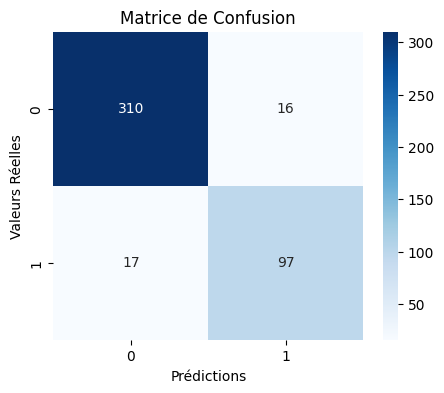

In [26]:
# 7. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()


In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1 
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Rapport global 
print("\nClassification Report :")
print(classification_report(y_test, y_pred))
 
# Matrice de confusion  
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)  


Accuracy: 0.925
Precision: 0.8584070796460177
Recall: 0.8508771929824561
F1-score: 0.8546255506607929

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       326
           1       0.86      0.85      0.85       114

    accuracy                           0.93       440
   macro avg       0.90      0.90      0.90       440
weighted avg       0.92      0.93      0.92       440


Matrice de confusion :
 [[310  16]
 [ 17  97]]


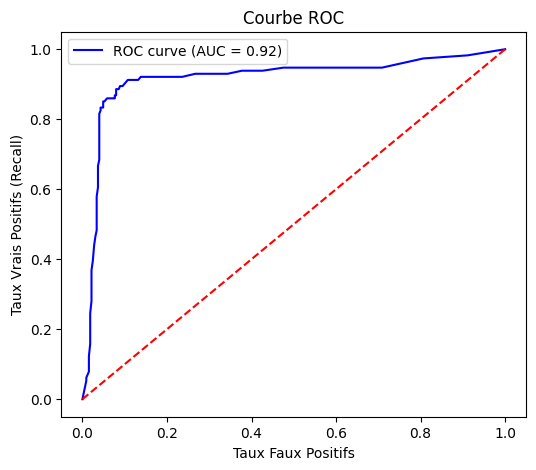

In [ ]:
# 9. Courbe ROC
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label="ROC curve (AUC = %.2f)" % roc_auc)
plt.plot([0,1], [0,1], color='red', linestyle="--")
plt.xlabel("Taux Faux Positifs")
plt.ylabel("Taux Vrais Positifs (Recall)")
plt.title("Courbe ROC") 
plt.legend() 
plt.show()